In [48]:
#KÜTÜPHANELER
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
#from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [49]:
#!pip install lightgbm
#XGBRegressor?

In [50]:
dist = pd.read_excel("piksel_matris8.xlsx")
dist.head(20)
dist.shape
pd.isnull(dist["Sonuç"]).sum()

0

In [51]:
dist.shape

(414, 10)

In [52]:
df=dist.copy()

In [53]:
df.head(10)

,Unnamed: 0,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY,Sonuç
0,"150SOL6,2M",363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0,6.2
1,"150SOL7,2M",449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0,7.2
2,"150SOL8,2M",507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5,8.2
3,"150SOL10,2M",599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0,10.2
4,"150SOL11,2M",611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0,11.2
5,"150SOL12,2M",665.0,3943.0,1659.0,3058.0,1550.0,1694.5,2393.0,35.5,12.2
6,"150SOL13,2M",688.0,3920.0,1642.0,3118.5,1489.5,1675.5,2430.5,33.5,13.2
7,"150SOL14,2M",711.5,3896.5,1596.0,3175.5,1432.5,1632.0,2464.0,36.0,14.2
8,"150SOL15,2M",722.0,3886.0,1532.0,3213.0,1395.0,1569.5,2491.0,37.5,15.2
9,"150SOL17,2M",763.0,3845.0,1534.0,3287.0,1321.0,1569.5,2524.0,35.5,17.2


In [54]:
df=df.iloc[:,1:len(df)]

In [55]:
df.head()

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY,Sonuç
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0,6.2
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0,7.2
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5,8.2
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0,10.2
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0,11.2


In [56]:
df.shape

(414, 9)

In [57]:
y=df["Sonuç"]
x=df.drop("Sonuç",axis=1)

In [58]:
x.head()

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0


In [59]:
y.head()

0     6.2
1     7.2
2     8.2
3    10.2
4    11.2
Name: Sonuç, dtype: float64

In [60]:
y

0       6.2
1       7.2
2       8.2
3      10.2
4      11.2
       ... 
409    34.2
410    41.2
411    48.2
412    55.2
413    62.2
Name: Sonuç, Length: 414, dtype: float64

In [61]:
x

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0
...,...,...,...,...,...,...,...,...
409,1049.0,3559.0,1782.0,3765.0,843.0,1827.5,2716.0,45.0
410,964.5,3643.5,1680.0,3705.0,903.0,1728.5,2740.5,48.5
411,950.5,3657.5,1676.0,3710.0,898.0,1725.0,2759.5,49.0
412,973.0,3635.0,1638.5,3748.5,859.5,1683.5,2775.5,45.0


In [62]:
x_train=x[0:352]

In [63]:
x_train

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,363.5,4244.5,2097.0,2363.0,2245.0,2103.0,1999.5,6.0
1,449.0,4159.0,1955.5,2545.5,2062.5,1979.5,2096.5,24.0
2,507.5,4100.5,1848.0,2687.5,1920.5,1881.5,2180.0,33.5
3,599.0,4009.0,1704.0,2898.0,1710.0,1743.0,2299.0,39.0
4,611.5,3996.5,1683.5,2963.5,1644.5,1721.5,2352.0,38.0
...,...,...,...,...,...,...,...,...
347,943.0,3665.0,1653.5,3722.5,885.5,1702.5,2779.5,49.0
348,918.0,3690.0,1676.0,3697.0,911.0,1728.0,2779.0,52.0
349,979.0,3629.0,1712.5,3764.0,844.0,1748.5,2785.0,36.0
350,985.5,3622.5,1665.0,3769.5,838.5,1709.5,2784.0,44.5


In [64]:
x_test=x[352:]

In [65]:
x_test

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
352,569.5,4038.5,1765.5,2813.5,1794.5,1802.5,2244.0,37.0
353,733.5,3874.5,1490.5,3250.0,1358.0,1511.0,2516.5,20.5
354,806.0,3802.0,1405.5,3423.0,1185.0,1434.0,2617.0,28.5
355,862.0,3746.0,1343.0,3543.0,1065.0,1362.0,2681.0,19.0
356,866.5,3741.5,1311.0,3593.0,1015.0,1328.5,2726.5,17.5
...,...,...,...,...,...,...,...,...
409,1049.0,3559.0,1782.0,3765.0,843.0,1827.5,2716.0,45.0
410,964.5,3643.5,1680.0,3705.0,903.0,1728.5,2740.5,48.5
411,950.5,3657.5,1676.0,3710.0,898.0,1725.0,2759.5,49.0
412,973.0,3635.0,1638.5,3748.5,859.5,1683.5,2775.5,45.0


In [66]:
y_train=y[0:352]

In [67]:
y_train

0       6.2
1       7.2
2       8.2
3      10.2
4      11.2
       ... 
347    57.2
348    58.2
349    59.2
350    60.2
351    61.2
Name: Sonuç, Length: 352, dtype: float64

In [68]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=60)

In [69]:
y_test=y[352:]

In [70]:
y_test

352     9.2
353    16.2
354    23.2
355    30.2
356    37.2
       ... 
409    34.2
410    41.2
411    48.2
412    55.2
413    62.2
Name: Sonuç, Length: 62, dtype: float64

In [71]:
x_scaled=x/4343.5

In [72]:
x_scaled[:5]

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,0.083688,0.977207,0.482790,0.544031,0.516864,0.484172,0.460343,0.001381
1,0.103373,0.957523,0.450213,0.586048,0.474847,0.455738,0.482675,0.005525
2,0.116841,0.944054,0.425463,0.618741,0.442155,0.433176,0.501899,0.007713
3,0.137907,0.922988,0.392310,0.667204,0.393692,0.401289,0.529297,0.008979
4,0.140785,0.920111,0.387591,0.682284,0.378612,0.396339,0.541499,0.008749


In [73]:
y_scaled=y/62.2

In [74]:
y_scaled[:5]

0    0.099678
1    0.115756
2    0.131833
3    0.163987
4    0.180064
Name: Sonuç, dtype: float64

In [75]:
x_train_scaled=x_scaled[0:352]

In [76]:
x_train_scaled

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
0,0.083688,0.977207,0.482790,0.544031,0.516864,0.484172,0.460343,0.001381
1,0.103373,0.957523,0.450213,0.586048,0.474847,0.455738,0.482675,0.005525
2,0.116841,0.944054,0.425463,0.618741,0.442155,0.433176,0.501899,0.007713
3,0.137907,0.922988,0.392310,0.667204,0.393692,0.401289,0.529297,0.008979
4,0.140785,0.920111,0.387591,0.682284,0.378612,0.396339,0.541499,0.008749
...,...,...,...,...,...,...,...,...
347,0.217106,0.843790,0.380684,0.857028,0.203868,0.391965,0.639922,0.011281
348,0.211350,0.849545,0.385864,0.851157,0.209739,0.397836,0.639807,0.011972
349,0.225394,0.835501,0.394267,0.866582,0.194313,0.402556,0.641188,0.008288
350,0.226891,0.834005,0.383331,0.867849,0.193047,0.393577,0.640958,0.010245


In [77]:
x_test_scaled=x_scaled[352:]

In [78]:
x_test_scaled

,AX1,AX2,AY1,BX1,BX2,BY1,PX,PY
352,0.131115,0.929780,0.406469,0.647750,0.413146,0.414988,0.516634,0.008518
353,0.168873,0.892023,0.343156,0.748245,0.312651,0.347876,0.579371,0.004720
354,0.185565,0.875331,0.323587,0.788074,0.272821,0.330148,0.602509,0.006562
355,0.198457,0.862438,0.309198,0.815702,0.245194,0.313572,0.617244,0.004374
356,0.199493,0.861402,0.301830,0.827213,0.233683,0.305859,0.627720,0.004029
...,...,...,...,...,...,...,...,...
409,0.241510,0.819385,0.410268,0.866812,0.194083,0.420744,0.625302,0.010360
410,0.222056,0.838840,0.386785,0.852999,0.207897,0.397951,0.630943,0.011166
411,0.218833,0.842063,0.385864,0.854150,0.206746,0.397145,0.635317,0.011281
412,0.224013,0.836883,0.377230,0.863014,0.197882,0.387591,0.639001,0.010360


In [79]:
y_train_scaled=y_scaled[0:352]

In [80]:
y_train_scaled

0      0.099678
1      0.115756
2      0.131833
3      0.163987
4      0.180064
         ...   
347    0.919614
348    0.935691
349    0.951768
350    0.967846
351    0.983923
Name: Sonuç, Length: 352, dtype: float64

In [81]:
y_test_scaled=y_scaled[352:]

In [82]:
y_test_scaled

352    0.147910
353    0.260450
354    0.372990
355    0.485531
356    0.598071
         ...   
409    0.549839
410    0.662379
411    0.774920
412    0.887460
413    1.000000
Name: Sonuç, Length: 62, dtype: float64

In [83]:
#LGBMRegressor?

In [84]:
lgbm_model = LGBMRegressor()
#lgbm_model.fit(x_train_scaled,y_train)

In [85]:
#y_pred = lgbm_model.predict(x_test_scaled)

In [86]:
cart_params={"n_estimators":[75,100,125],"max_depth":[5,10,20],"learning_rate":[0.1,0.3],"min_split_gain":[0.01,0.1],"num_leaves":[10,31,50]}
cart_cv_model=GridSearchCV(lgbm_model,cart_params,cv=10)

In [87]:
cart_cv_model.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [5, 10, 20],
                         'min_split_gain': [0.01, 0.1],
                         'n_estimators': [75, 100, 125],
                         'num_leaves': [10, 31, 50]})

In [88]:
cart_cv_model.best_params_

{'learning_rate': 0.3,
 'max_depth': 5,
 'min_split_gain': 0.1,
 'n_estimators': 100,
 'num_leaves': 31}

In [89]:
y_pred=cart_cv_model.predict(x_test_scaled)

In [90]:
##cart_opt=XGBRegressor(gamma=0.9)
##cart_opt.fit(x_train_scaled,y_train)
##y_pred=cart_opt.predict(x_test_scaled)

In [91]:
mape_deger=mean_absolute_percentage_error(y_test,y_pred)

In [92]:
mape_deger*100

3.7407077600872896

In [93]:
plt.style.use("seaborn-bright")

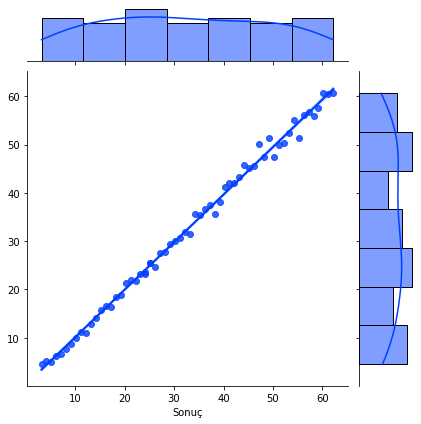

In [94]:
sns.jointplot(y_test, y_pred, kind="reg")
plt.show()